<!-- imports -->

# imports

In [56]:
import data_utils as utils # replace
from datetime import datetime as dt
import pandas as pd
import xarray as xr
import seaborn as sns
from matplotlib import pyplot as plt
import random
import numpy as np

In [4]:
bucket_name = 'sundai-satellite-data'
site = 'US-A32'

modis_path = f'gs://{bucket_name}/modis/modis_{site}.nc'
landsat_path = f'gs://{bucket_name}/landsat/landsat_{site}.nc'
embeddings_path = f'gs://{bucket_name}/embeddings/alpha_earth_{site}.nc'

In [5]:
modis = utils.load_dataset(modis_path)
landsat = utils.load_dataset(landsat_path)
embeddings = utils.load_dataset(embeddings_path)

In [26]:
embeddings.time.values

array(['2017-01-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000', '2022-01-01T00:00:00.000000000',
       '2023-01-01T00:00:00.000000000', '2024-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [77]:
# radndomly selected 50  values  from landsat.time.values

random_dates= random.sample(list(landsat.time.values), 50)


In [60]:
 embeddings.time.values

t = [pd.to_datetime(j) for j in embeddings.time.values]
t_dates = pd.to_datetime(t)
t_dates

DatetimeIndex(['2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
               '2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'],
              dtype='datetime64[ns]', freq=None)

In [61]:
rs_date

# get the nearest data in t_dates to rs_date
t_dates[np.abs(t_dates - rs_date).argmin()] 

Timestamp('2017-01-01 00:00:00')

In [90]:
landsat

<xarray.Dataset>
Dimensions:          (time: 652, y: 97, x: 108)
Coordinates:
  * y                (y) float64 4.077e+06 4.077e+06 ... 4.074e+06 4.074e+06
  * x                (x) float64 6.037e+05 6.037e+05 ... 6.068e+05 6.069e+05
    spatial_ref      int64 0
  * time             (time) datetime64[ns] 2002-01-12 2002-01-20 ... 2024-09-29
Data variables: (12/16)
    blue             (time, y, x) uint16 599 501 501 469 436 ... 516 517 541 550
    green            (time, y, x) uint16 921 853 786 786 718 ... 752 745 781 780
    red              (time, y, x) uint16 1022 885 831 776 ... 1024 965 950 950
    nir08            (time, y, x) uint16 4028 4364 4432 4263 ... 1974 2053 2062
    swir16           (time, y, x) uint16 3095 2858 2772 2643 ... 3023 3028 2989
    swir22           (time, y, x) uint16 2115 1869 1746 1562 ... 2342 2305 2237
    ...               ...
    cloud_cover      (time) float64 0.0 4.0 39.0 0.5 ... 19.45 0.15 10.48 0.075
    VZA              (time, y, x) float32 1.405 1.405 1.405 ... 1.84 1.83 1.83
    VAA              (time, y, x) float32 105.7 105.7 105.7 ... 128.6 128.6
    SZA              (time, y, x) float32 6.424e+03 6.424e+03 ... 4.318e+03
    SAA              (time, y, x) float32 1.507e+04 1.507e+04 ... 1.524e+04
    solar_zenith     (time) float64 64.14 62.6 60.96 57.34 ... 37.97 39.91 43.07

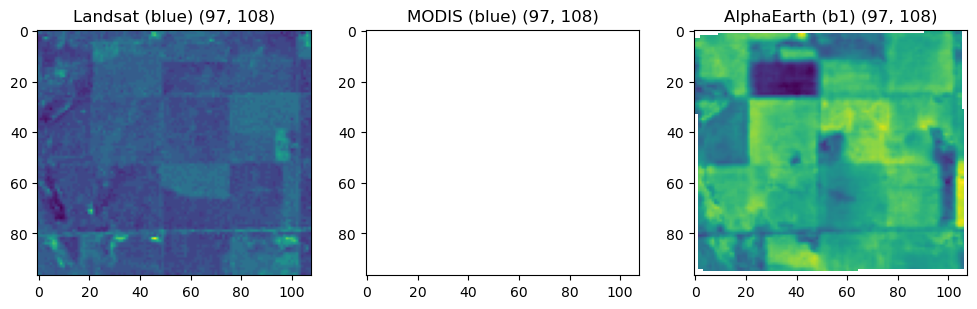

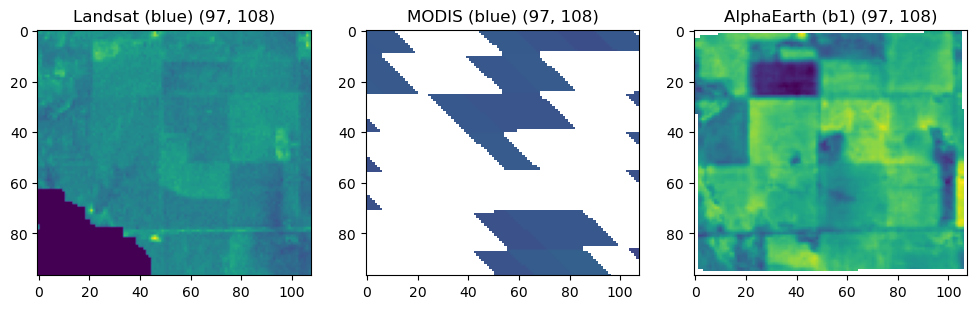

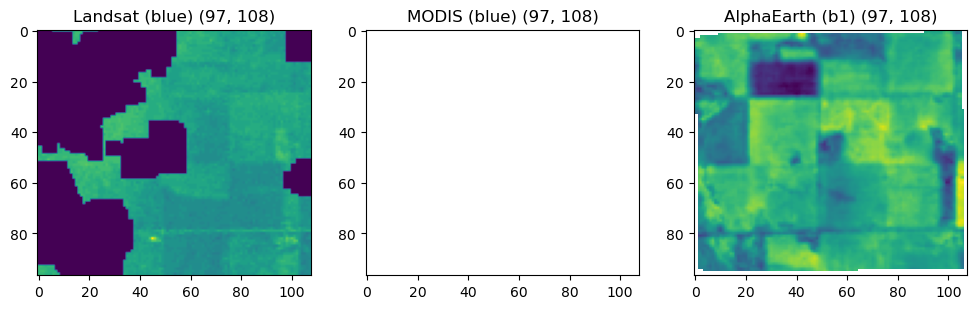

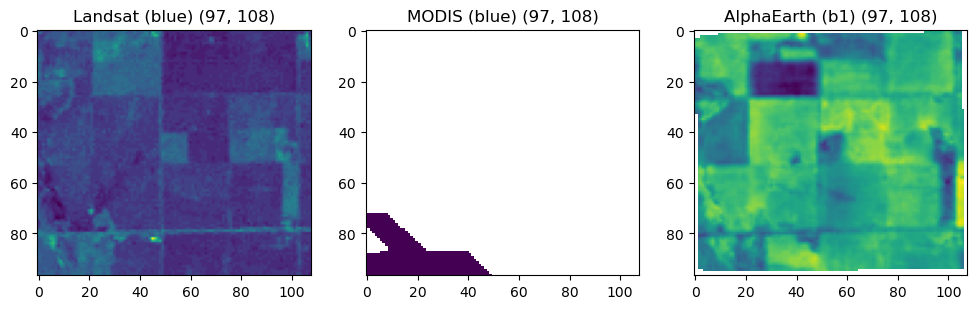

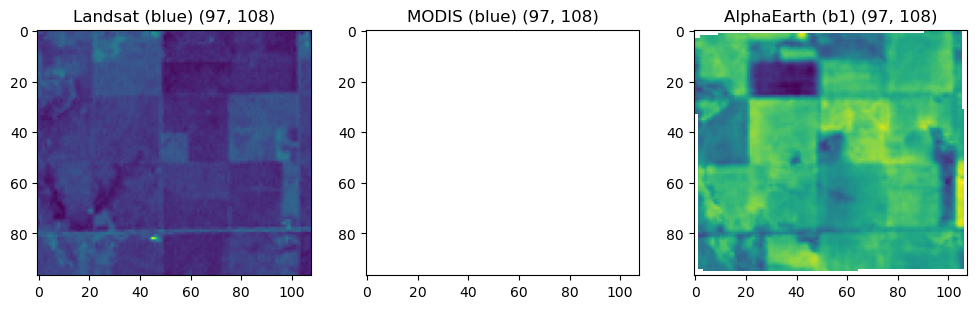

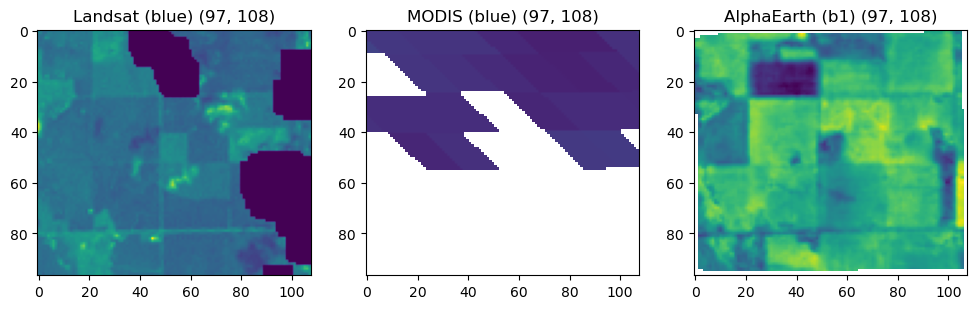

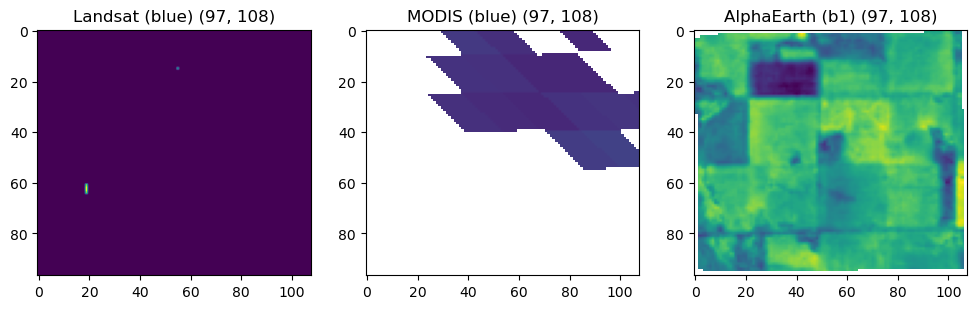

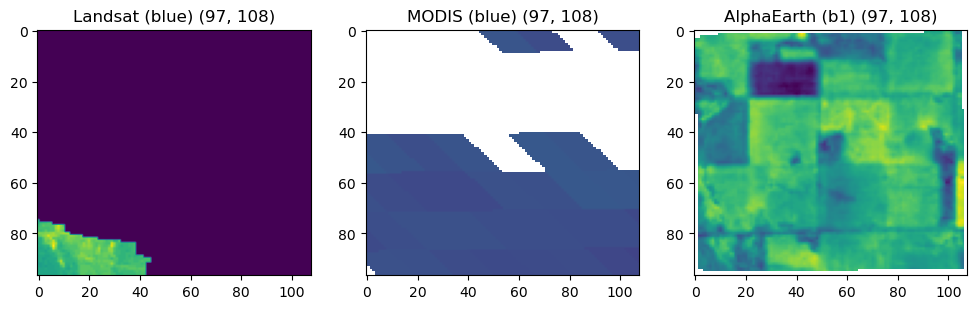

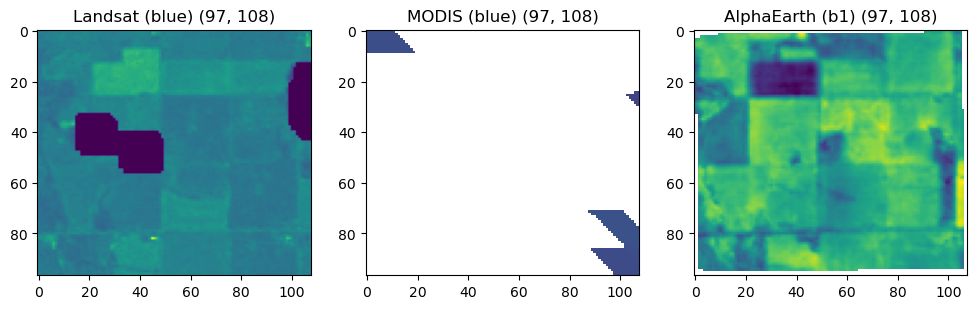

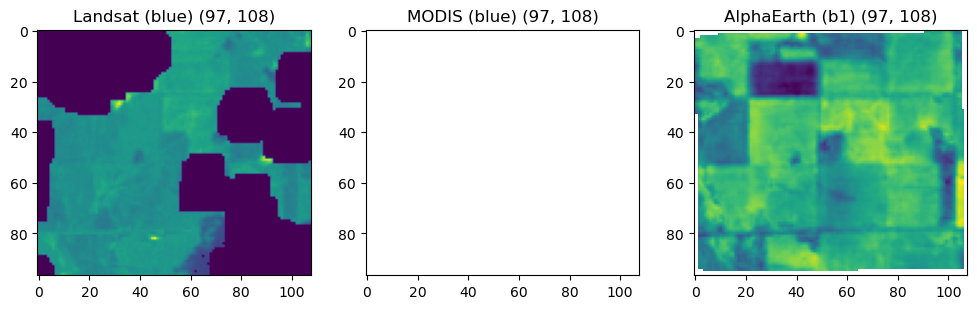

In [88]:
for date_index in range(10):
    i = landsat.time.values[date_index]

    rs_date = pd.to_datetime(i)
    ae_date = t_dates[np.abs(t_dates - rs_date).argmin()] 

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # Adjust figure size here

    landsat_sample = landsat.green.sel(time=rs_date, method='nearest')
    modis_sample = modis.blue.sel(time=rs_date, method='nearest')
    embeddings_sample = embeddings.sel(time=ae_date, band=1, method='nearest').embedding

    axes[0].imshow(landsat_sample)
    axes[1].imshow(modis_sample, vmin=landsat_sample.min(), vmax=landsat_sample.max())
    axes[2].imshow(embeddings_sample)

    axes[0].set_title(f'Landsat (blue) {landsat_sample.shape}')
    axes[1].set_title(f'MODIS (blue) {modis_sample.shape}')
    axes[2].set_title(f'AlphaEarth (b1) {embeddings_sample.shape}')
    plt.show()

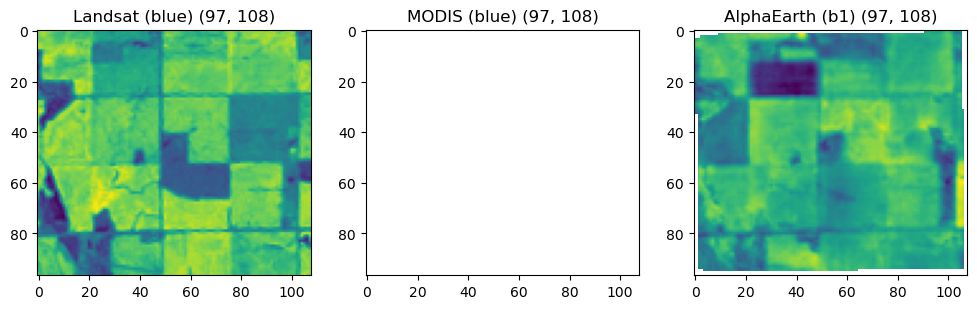

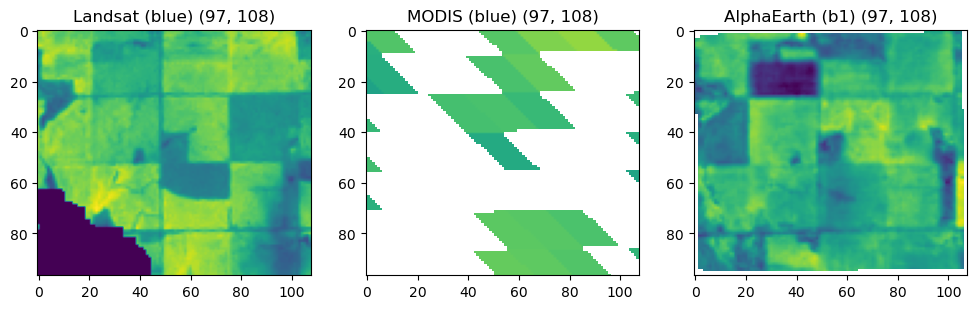

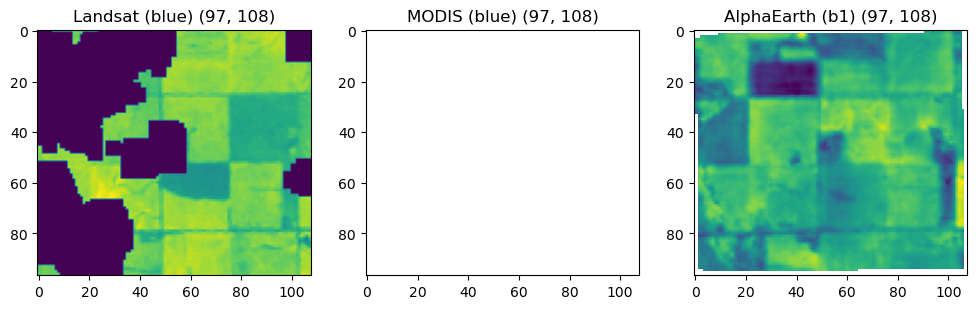

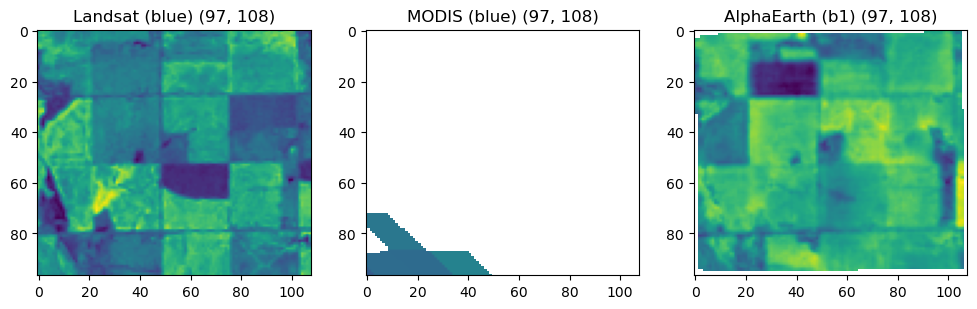

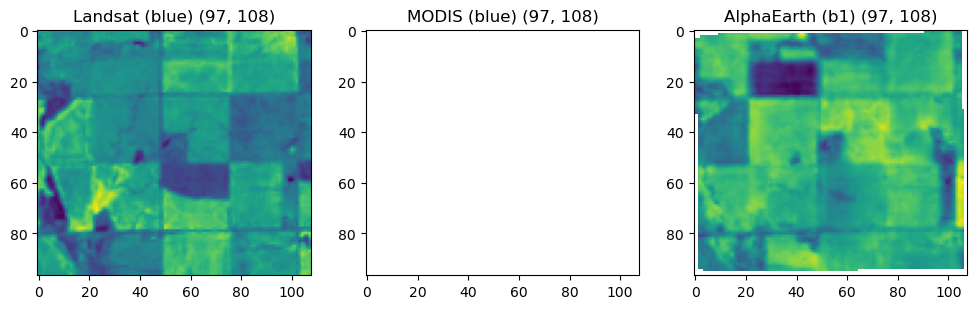

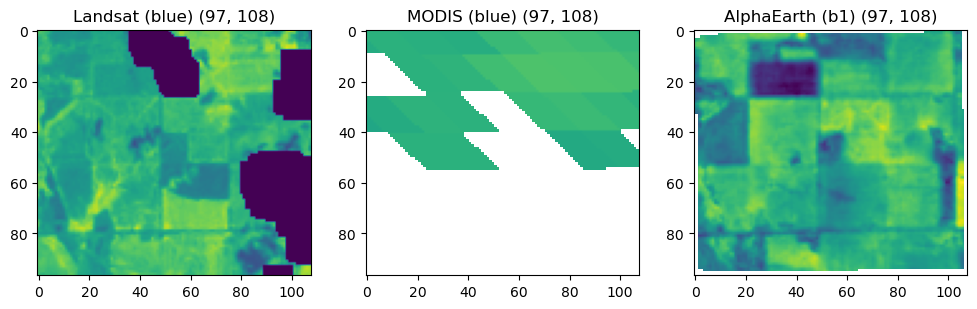

In [92]:
for date_index in range(6):
    i = landsat.time.values[date_index]

    rs_date = pd.to_datetime(i)
    ae_date = t_dates[np.abs(t_dates - rs_date).argmin()] 

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # Adjust figure size here

    landsat_sample = landsat.nir08.sel(time=rs_date, method='nearest')
    modis_sample = modis.nir08.sel(time=rs_date, method='nearest')
    embeddings_sample = embeddings.sel(time=ae_date, band=1, method='nearest').embedding

    axes[0].imshow(landsat_sample)
    axes[1].imshow(modis_sample, vmin=landsat_sample.min(), vmax=landsat_sample.max())
    axes[2].imshow(embeddings_sample)

    axes[0].set_title(f'Landsat (blue) {landsat_sample.shape}')
    axes[1].set_title(f'MODIS (blue) {modis_sample.shape}')
    axes[2].set_title(f'AlphaEarth (b1) {embeddings_sample.shape}')
    plt.show()

In [ ]:
landsat

<xarray.Dataset>
Dimensions:          (time: 652, y: 97, x: 108)
Coordinates:
  * y                (y) float64 4.077e+06 4.077e+06 ... 4.074e+06 4.074e+06
  * x                (x) float64 6.037e+05 6.037e+05 ... 6.068e+05 6.069e+05
    spatial_ref      int64 0
  * time             (time) datetime64[ns] 2002-01-12 2002-01-20 ... 2024-09-29
Data variables: (12/16)
    blue             (time, y, x) uint16 599 501 501 469 436 ... 516 517 541 550
    green            (time, y, x) uint16 921 853 786 786 718 ... 752 745 781 780
    red              (time, y, x) uint16 1022 885 831 776 ... 1024 965 950 950
    nir08            (time, y, x) uint16 4028 4364 4432 4263 ... 1974 2053 2062
    swir16           (time, y, x) uint16 3095 2858 2772 2643 ... 3023 3028 2989
    swir22           (time, y, x) uint16 2115 1869 1746 1562 ... 2342 2305 2237
    ...               ...
    cloud_cover      (time) float64 0.0 4.0 39.0 0.5 ... 19.45 0.15 10.48 0.075
    VZA              (time, y, x) float32 1.405 1.405 1.405 ... 1.84 1.83 1.83
    VAA              (time, y, x) float32 105.7 105.7 105.7 ... 128.6 128.6
    SZA              (time, y, x) float32 6.424e+03 6.424e+03 ... 4.318e+03
    SAA              (time, y, x) float32 1.507e+04 1.507e+04 ... 1.524e+04
    solar_zenith     (time) float64 64.14 62.6 60.96 57.34 ... 37.97 39.91 43.07

In [7]:
modis

<xarray.Dataset>
Dimensions:                                   (time: 7992, y: 97, x: 108)
Coordinates:
  * time                                      (time) datetime64[ns] 2001-12-2...
  * y                                         (y) float64 4.077e+06 ... 4.074...
  * x                                         (x) float64 6.037e+05 ... 6.069...
    spatial_ref                               int32 32614
Data variables:
    blue                                      (time, y, x) float32 345.0 ... nan
    green                                     (time, y, x) float32 761.0 ... nan
    red                                       (time, y, x) float32 702.0 ... nan
    nir08                                     (time, y, x) float32 3.815e+03 ...
    swir16                                    (time, y, x) float32 2.705e+03 ...
    swir22                                    (time, y, x) float32 1.361e+03 ...
    BRDF_Albedo_Band_Mandatory_Quality_Band3  (time, y, x) float64 nan ... 1.0

In [8]:
embeddings

<xarray.Dataset>
Dimensions:      (band: 64, x: 108, y: 97, time: 8)
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9 ... 56 57 58 59 60 61 62 63 64
    spatial_ref  int64 0
  * x            (x) float64 6.037e+05 6.037e+05 ... 6.068e+05 6.069e+05
  * y            (y) float64 4.077e+06 4.077e+06 ... 4.074e+06 4.074e+06
  * time         (time) datetime64[ns] 2017-01-01 2018-01-01 ... 2024-01-01
Data variables:
    embedding    (time, band, y, x) float32 nan nan nan nan ... nan nan nan nan

In [82]:
rs_date

Timestamp('2024-09-13 00:00:00')

Text(0.5, 1.0, 'AlphaEarth (b1)')

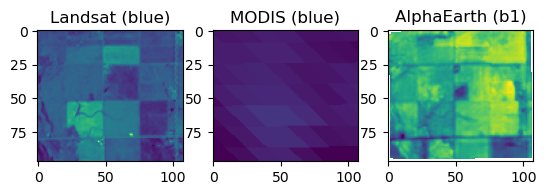

In [14]:
fig, axes = plt.subplots(1,3)
landsat_sample = landsat.green.sel(time=rs_date)
modis_sample = modis.blue.sel(time=rs_date)
embeddings_sample = embeddings.sel(time=ae_date, band=1).embedding

axes[0].imshow(landsat_sample)
axes[1].imshow(modis_sample, vmin = landsat_sample.min(), vmax=landsat_sample.max())
axes[2].imshow(embeddings_sample)

axes[0].set_title('Landsat (blue)')
axes[1].set_title('MODIS (blue)')
axes[2].set_title('AlphaEarth (b1)')

<Axes: title={'center': 'Landsat, MODIS pixel values'}, ylabel='Count'>

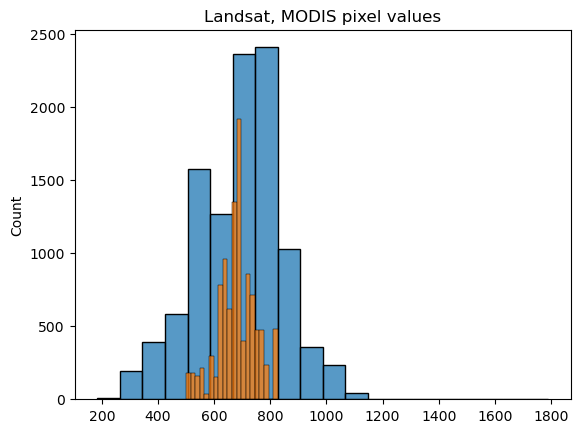

In [11]:
plt.title('Landsat, MODIS pixel values')
sns.histplot(landsat_sample.values.flatten(), bins=20, label='Landsat')
sns.histplot(modis_sample.values.flatten(), bins=20, label='MODIS')

<Axes: ylabel='Count'>

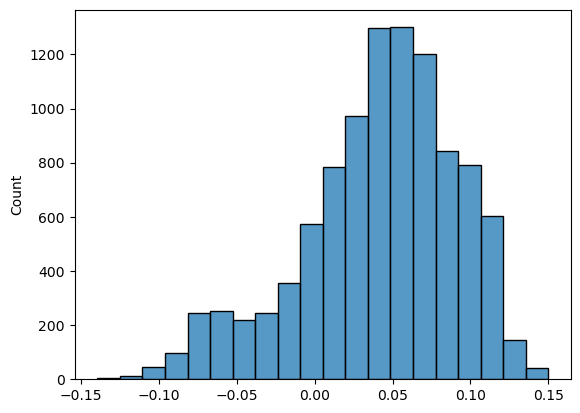

In [12]:
sns.histplot(embeddings_sample.values.flatten(), bins=20, label='Landsat')

# CNN training

In [107]:
from sklearn.model_selection import train_test_split

num_images = len(landsat.time.values)
indices = list(range(num_images))

train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)
train_idx, val_idx = train_test_split(train_idx, test_size=0.2, random_state=42)

In [108]:
def get_sample(idx):
    rs_date = pd.to_datetime(landsat.time.values[idx])
    ae_date = t_dates[np.abs(t_dates - rs_date).argmin()]
    modis_img = modis.blue.sel(time=rs_date, method='nearest').values
    embedding_img = embeddings.sel(time=ae_date, band=1, method='nearest').embedding.values
    landsat_img = landsat.blue.sel(time=rs_date, method='nearest').values
    return modis_img, embedding_img, landsat_img

def make_dataset(indices):
    X_modis, X_embed, Y_landsat = [], [], []
    for idx in indices:
        modis_img, embedding_img, landsat_img = get_sample(idx)
        X_modis.append(modis_img)
        X_embed.append(embedding_img)
        Y_landsat.append(landsat_img)
    return np.stack(X_modis), np.stack(X_embed), np.stack(Y_landsat)

X_modis_train, X_embed_train, Y_train = make_dataset(train_idx)
X_modis_val, X_embed_val, Y_val = make_dataset(val_idx)
X_modis_test, X_embed_test, Y_test = make_dataset(test_idx)

## addressing missing values

In [109]:
X_modis_train = np.nan_to_num(X_modis_train, nan=0.0, posinf=0.0, neginf=0.0)
X_embed_train = np.nan_to_num(X_embed_train, nan=0.0, posinf=0.0, neginf=0.0)
Y_train = np.nan_to_num(Y_train, nan=0.0, posinf=0.0, neginf=0.0)
# Repeat for val and test sets
X_modis_val = np.nan_to_num(X_modis_val, nan=0.0, posinf=0.0, neginf=0.0)
X_embed_val = np.nan_to_num(X_embed_val, nan=0.0, posinf=0.0, neginf=0.0)
Y_val = np.nan_to_num(Y_val, nan=0.0, posinf=0.0, neginf=0.0)
X_modis_test = np.nan_to_num(X_modis_test, nan=0.0, posinf=0.0, neginf=0.0)
X_embed_test = np.nan_to_num(X_embed_test, nan=0.0, posinf=0.0, neginf=0.0)             

In [110]:
X_modis_train = X_modis_train / X_modis_train.max()
X_embed_train = X_embed_train / X_embed_train.max()
Y_train = Y_train / Y_train.max()
# Repeat for val and test sets

X_modis_val = X_modis_val / X_modis_val.max()
X_embed_val = X_embed_val / X_embed_val.max()
Y_val = Y_val / Y_val.max()
X_modis_test = X_modis_test / X_modis_test.max()
X_embed_test = X_embed_test / X_embed_test.max()
Y_test = Y_test / Y_test.max()  

In [111]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(2, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.fc = nn.Linear(16, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        # Output shape: (batch, 16, H, W)
        # Reduce channels to 1
        x = x.mean(dim=1, keepdim=True)
        return x

# Prepare PyTorch datasets
def to_tensor(X1, X2, Y):
    # Convert to float32 before stacking
    X1 = X1.astype(np.float32)
    X2 = X2.astype(np.float32)
    Y = Y.astype(np.float32)
    X = np.stack([X1, X2], axis=1)  # shape: (N, 2, H, W)
    return torch.tensor(X, dtype=torch.float32), torch.tensor(Y[:, None], dtype=torch.float32)

X_train, Y_train = to_tensor(X_modis_train, X_embed_train, Y_train)
X_val, Y_val = to_tensor(X_modis_val, X_embed_val, Y_val)
X_test, Y_test = to_tensor(X_modis_test, X_embed_test, Y_test)

# Model, loss, optimizer
model = SimpleCNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [112]:
print(np.isnan(X_modis_train).sum(), np.isnan(X_embed_train).sum(), np.isnan(Y_train).sum())
print(np.isinf(X_modis_train).sum(), np.isinf(X_embed_train).sum(), np.isinf(Y_train).sum())

0 0 tensor(0)
0 0 tensor(0)


In [113]:
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, Y_val)
        print(f"Validation Loss: {val_loss.item()}")

Epoch 1, Loss: 0.0016526372637599707
Validation Loss: 0.0003423278103582561
Epoch 2, Loss: 0.0014456759672611952
Validation Loss: 0.00020006480917800218
Epoch 2, Loss: 0.0014456759672611952
Validation Loss: 0.00020006480917800218
Epoch 3, Loss: 0.0013566069537773728
Validation Loss: 0.00010851009574253112
Epoch 3, Loss: 0.0013566069537773728
Validation Loss: 0.00010851009574253112
Epoch 4, Loss: 0.0013133026659488678
Validation Loss: 5.155959661351517e-05
Epoch 4, Loss: 0.0013133026659488678
Validation Loss: 5.155959661351517e-05
Epoch 5, Loss: 0.001291852560825646
Validation Loss: 3.2222149457084015e-05
Epoch 5, Loss: 0.001291852560825646
Validation Loss: 3.2222149457084015e-05
Epoch 6, Loss: 0.0012853352818638086
Validation Loss: 3.4437183785485104e-05
Epoch 6, Loss: 0.0012853352818638086
Validation Loss: 3.4437183785485104e-05
Epoch 7, Loss: 0.0012871255166828632
Validation Loss: 3.609270788729191e-05
Epoch 7, Loss: 0.0012871255166828632
Validation Loss: 3.609270788729191e-05
Epoch 

In [114]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, Y_test)
    print(f"Test Loss: {test_loss.item()}")

Test Loss: 0.00014277928858064115


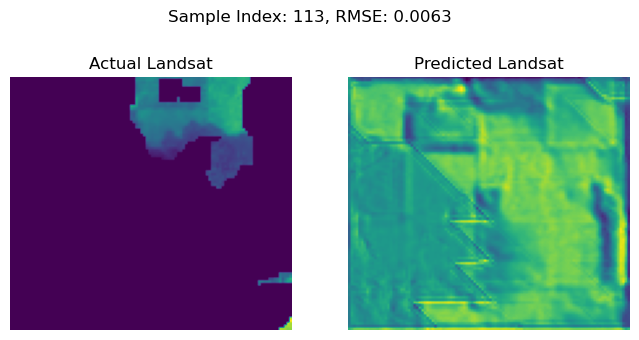

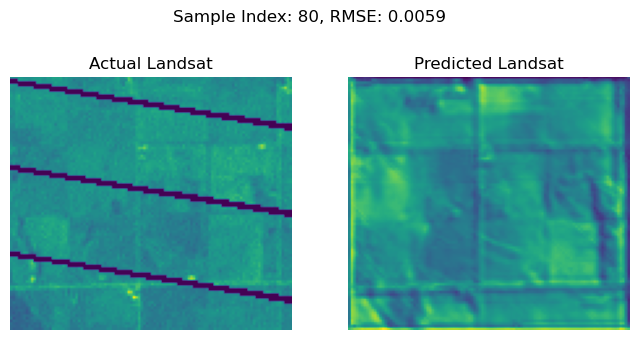

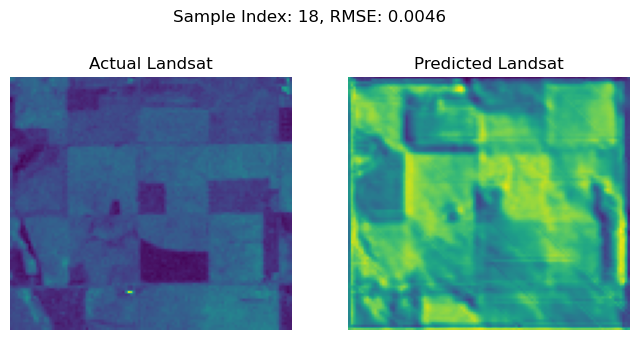

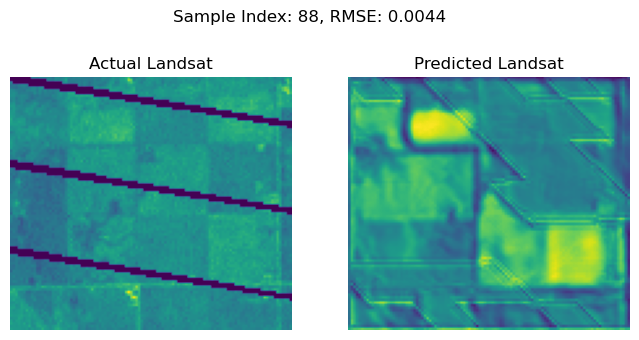

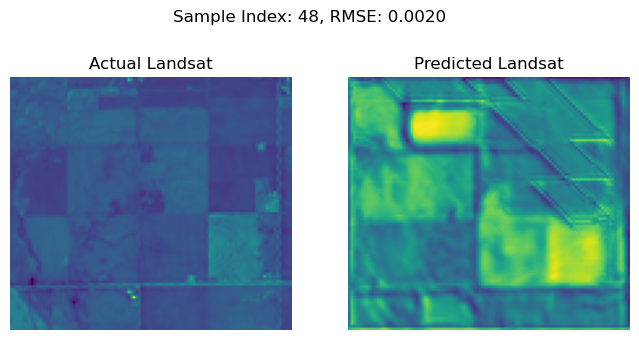

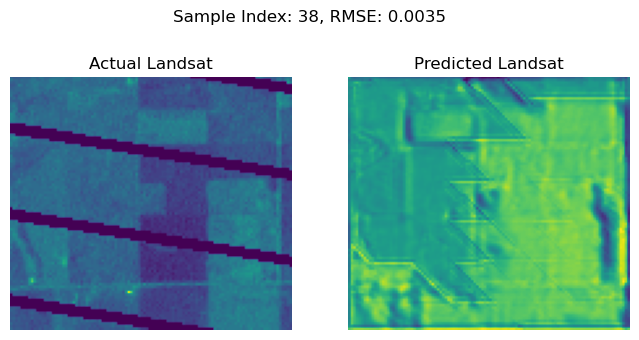

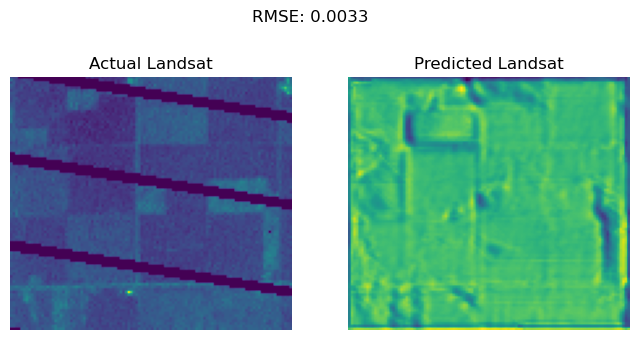

In [121]:
import matplotlib.pyplot as plt
import numpy as np


# plot the following results for the randomly selected 6 samples for the idx value

for i in random.sample(range(len(Y_test)), 6):
    idx = i  # index of the test image
    actual = Y_test[idx].squeeze().cpu().numpy()
    predicted = test_outputs[idx].squeeze().cpu().numpy()

    rmse_val = np.sqrt(np.mean((actual - predicted) ** 2))

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(actual, cmap='viridis')
    plt.title('Actual Landsat')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(predicted, cmap='viridis')
    plt.title('Predicted Landsat')
    plt.axis('off')

    plt.suptitle(f'Sample Index: {idx}, RMSE: {rmse_val:.4f}')
    plt.show()

idx = 60  # index of the test image
actual = Y_test[idx].squeeze().cpu().numpy()
predicted = test_outputs[idx].squeeze().cpu().numpy()

# compute RMSE for display
rmse_val = np.sqrt(np.mean((actual - predicted) ** 2))

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(actual, cmap='viridis')
plt.title('Actual Landsat')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(predicted, cmap='viridis')
plt.title('Predicted Landsat')
plt.axis('off')

plt.suptitle(f'RMSE: {rmse_val:.4f}')
plt.show()

--- Sample 0 ---
MAE: 0.00402504438534379
RMSE: 0.004723431542515755
NRMSE_mean: 1.9689496483549846
NRMSE_range: 0.2623224169545874
PSNR: 11.623291659219607
SSIM: 0.13813859184686184
R2: -2.307332193272919
Corr: 0.07106334754279471


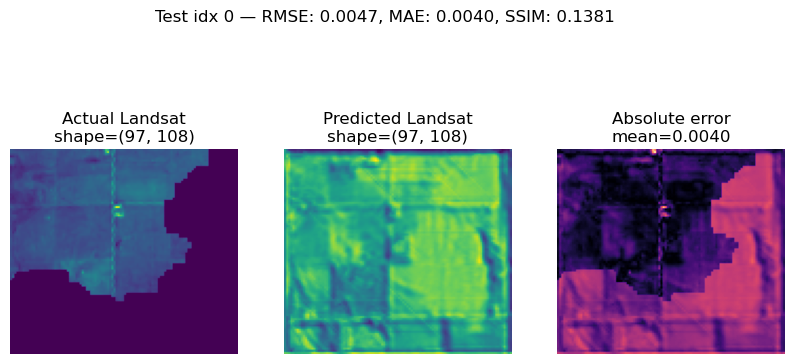

--- Sample 5 ---
MAE: 0.003700178349390626
RMSE: 0.004142936784774065
NRMSE_mean: 0.48367179657668874
NRMSE_range: 0.16444516755226282
PSNR: 15.679577791299275
SSIM: 0.26245974246851406
R2: -1.0680966479756728
Corr: 0.13632594731608125


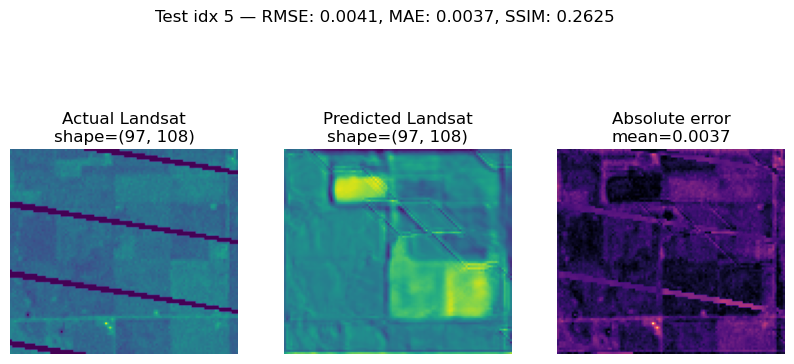

In [116]:
# Evaluation utilities: robust image metrics and side-by-side visualization
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim, peak_signal_noise_ratio as psnr
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
eps = 1e-8

def rmse(a, b):
    return np.sqrt(np.mean((a - b) ** 2))
def mae(a, b):
    return np.mean(np.abs(a - b))
def nrmse(a, b, norm='mean'):
    r = rmse(a, b)
    if norm == 'mean':
        denom = np.mean(np.abs(a)) + eps
    elif norm == 'range':
        denom = (np.max(a) - np.min(a)) + eps
    else:
        denom = 1.0
    return r / denom
def corr(a, b):
    a_f = a.flatten(); b_f = b.flatten()
    if a_f.std() < eps or b_f.std() < eps:
        return 0.0
    return np.corrcoef(a_f, b_f)[0,1]

def evaluate_image_pair(actual, predicted, mask=None):
    """Compute a set of metrics between two 2D arrays (actual, predicted).
    mask: boolean array where True = valid pixels. If None, use all finite pixels."""
    # ensure numpy floats
    actual = np.array(actual, dtype=np.float32)
    predicted = np.array(predicted, dtype=np.float32)

    if mask is None:
        mask = np.isfinite(actual) & np.isfinite(predicted)
    mask = mask & (np.isfinite(actual)) & (np.isfinite(predicted))
    if mask.sum() == 0:
        return {}
    a = actual[mask]
    p = predicted[mask]

    metrics = {}
    metrics['MAE'] = float(mae(a, p))
    metrics['RMSE'] = float(rmse(a, p))
    metrics['NRMSE_mean'] = float(nrmse(a, p, norm='mean'))
    metrics['NRMSE_range'] = float(nrmse(a, p, norm='range'))
    # PSNR/SSIM expect full images; compute on masked image by filling invalid with mean of actual
    try:
        metrics['PSNR'] = float(psnr(actual, predicted, data_range=np.nanmax(actual)-np.nanmin(actual)+eps))
    except Exception:
        metrics['PSNR'] = np.nan
    try:
        metrics['SSIM'] = float(ssim(actual, predicted, data_range=np.nanmax(actual)-np.nanmin(actual)+eps))
    except Exception:
        metrics['SSIM'] = np.nan
    try:
        metrics['R2'] = float(r2_score(a, p))
    except Exception:
        metrics['R2'] = np.nan
    metrics['Corr'] = float(corr(a, p))
    return metrics

# Example: show actual vs predicted with metrics for several test samples
def show_comparison(actual, predicted, title_prefix='Sample', cmap='viridis'):
    # convert to 2D numpy arrays
    a = np.array(actual, dtype=np.float32)
    p = np.array(predicted, dtype=np.float32)
    # build a simple mask: valid where actual is finite (and non-zero if needed)
    mask = np.isfinite(a) & np.isfinite(p)
    mets = evaluate_image_pair(a, p, mask=mask)

    plt.figure(figsize=(10,5))
    plt.suptitle(f"{title_prefix} — RMSE: {mets.get('RMSE', np.nan):.4f}, MAE: {mets.get('MAE', np.nan):.4f}, SSIM: {mets.get('SSIM', np.nan):.4f}")
    plt.subplot(1,3,1)
    plt.imshow(a, cmap=cmap)
    plt.title('Actual Landsat\nshape='+str(a.shape))
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(p, cmap=cmap)
    plt.title('Predicted Landsat\nshape='+str(p.shape))
    plt.axis('off')
    plt.subplot(1,3,3)
    diff = np.abs(a - p)
    plt.imshow(diff, cmap='magma')
    plt.title('Absolute error\nmean='+f"{np.nanmean(diff):.4f}")
    plt.axis('off')
    plt.show()

# If using the torch tensors computed earlier, run this example
try:
    # pick a few indices (safe-check sizes)
    n_test = X_test.shape[0] if 'X_test' in globals() else 0
    if 'test_outputs' in globals() and n_test>0:
        import torch
        # ensure numpy arrays
        for idx in [0, min(5, n_test-1)]:
            actual = Y_test[idx].squeeze().cpu().numpy() if hasattr(Y_test, 'cpu') else np.array(Y_test[idx])
            predicted = test_outputs[idx].squeeze().cpu().numpy() if hasattr(test_outputs, 'cpu') else np.array(test_outputs[idx])
            print(f"--- Sample {idx} ---")
            m = evaluate_image_pair(actual, predicted)
            for k,v in m.items():
                print(f"{k}: {v}")
            show_comparison(actual, predicted, title_prefix=f'Test idx {idx}')
    else:
        print('No test outputs available in the notebook namespace yet. Run training/evaluation first.')
except Exception as e:
    print('Evaluation cell failed:', e)

# tetsing different datavariable for the training